# Encoder Decoder LSTM

It is used for ```sequence to sequence``` model. You need equal size of input and output shape.

In [1]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_sequence(length):
    freq = 5
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

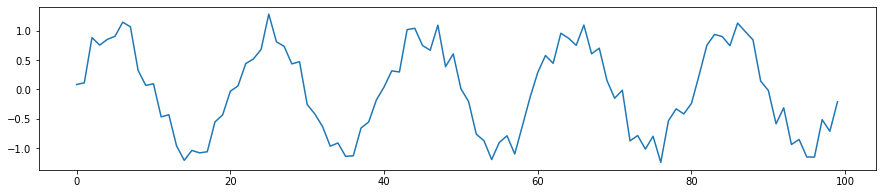

In [3]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()


In [4]:
def generate_examples(length, n_samples, output):
    
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence1 = get_sequence(length)
        sequence2 = get_sequence(output)
        
        # input output both will have same size
        X.append(sequence1)
        y.append(sequence2)
        
    X = np.array(X).reshape(n_samples, length, 1)
    y = np.array(y).reshape(n_samples, output, 1)
    
    return X, y

In [5]:
X,y = generate_examples(length=100, n_samples=50, output=100)

In [6]:
X.shape, y.shape

((50, 100, 1), (50, 100, 1))

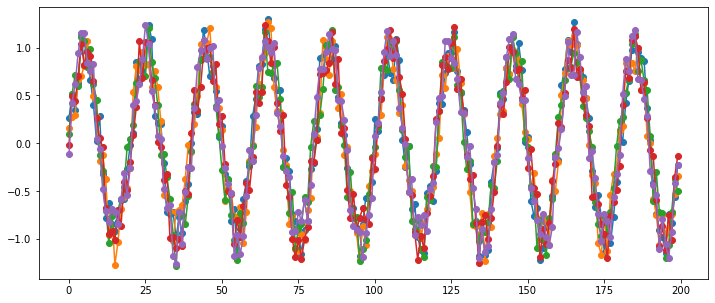

In [8]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5,100)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

![img](https://miro.medium.com/max/1400/1*1JcHGUU7rFgtXC_mydUA_Q.jpeg)

In [25]:
# Example of one output for whole sequence
from keras.models import Sequential, Model
from keras.layers import Input,LSTM,TimeDistributed,Dense,RepeatVector,Activation
#from keras.optimizers import Adam

In [19]:
# configure problem
sequence_length = 100
cell_unit = 64
output_length = 100

In [58]:
input_sequence = Input(shape=(sequence_length,1))

encoder = LSTM(64, return_sequences=False)(input_sequence)

r_vec = RepeatVector(sequence_length)(encoder)

decoder = LSTM(64, return_sequences=True)(r_vec)

output = TimeDistributed(Dense(sequence_length))(decoder)

In [59]:
model = Model(input_sequence, (output))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 100, 64)          0         
 or)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 100, 64)           33024     
                                                                 
 time_distributed_2 (TimeDis  (None, 100, 100)         6500      
 tributed)                                                       
                                                                 
Total params: 56,420
Trainable params: 56,420
Non-trainable

In [60]:
#First Layer
n = 1 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

480


In [61]:
#Middle Layer
n = 10 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

840


In [62]:
#Dense Layer
n = 10 #input vetor x
m = 25 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

275


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [63]:
sequence_length = 100
output_length = 100

In [64]:
X, y = generate_examples(sequence_length, 1000, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [65]:
X.shape, y.shape

((1000, 100, 1), (1000, 100, 1))

In [66]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
100/100 [==============================] - 9s 68ms/step - loss: 0.2556 - accuracy: 0.0000e+00 - val_loss: 0.0372 - val_accuracy: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 6s 60ms/step - loss: 0.0339 - accuracy: 0.0000e+00 - val_loss: 0.0336 - val_accuracy: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 6s 60ms/step - loss: 0.0336 - accuracy: 0.0000e+00 - val_loss: 0.0336 - val_accuracy: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 6s 62ms/step - loss: 0.0320 - accuracy: 0.0000e+00 - val_loss: 0.0317 - val_accuracy: 0.0000e+00
Epoch 5/5
100/100 [==============================] - 6s 61ms/step - loss: 0.0317 - accuracy: 0.0000e+00 - val_loss: 0.0312 - val_accuracy: 0.0000e+00


In [67]:
print(history.history)

{'loss': [0.25563982129096985, 0.033856578171253204, 0.03363795205950737, 0.03197513893246651, 0.03167044743895531], 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [0.037232428789138794, 0.0335710383951664, 0.03359416127204895, 0.03172670677304268, 0.031235048547387123], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0]}


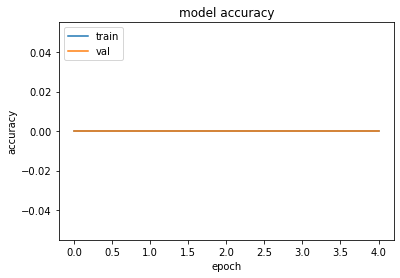

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

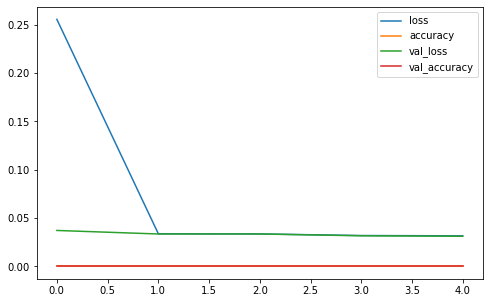

In [69]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [70]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0)
loss

[0.0312271099537611, 0.0]

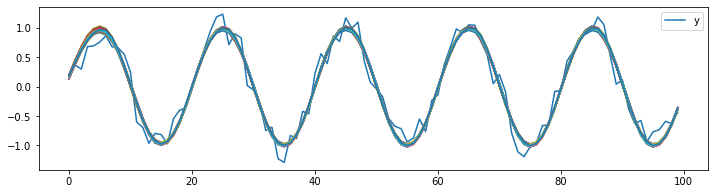

In [71]:
# prediction on new data
X, y = generate_examples(sequence_length, 1, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0]) 
plt.legend()
plt.show()


In [72]:
yhat[0].shape, y[0].shape

((100, 100), (100, 1))

- Note: There are 100 plots of y-hat. Each LSTM produce a output that goes to dense layer.

### Weight Matrices

In [76]:
for array in model.layers[0].get_weights():
    print (array.shape)

In [77]:
for array in model.layers[1].get_weights():
    print (array.shape)

(1, 256)
(64, 256)
(256,)


In [78]:
for array in model.layers[2].get_weights():
    print (array.shape)